In [1]:
import torch
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from torch_geometric.datasets import Planetoid
from torch_geometric.nn import Node2Vec

dataset = Planetoid(root='/tmp/Cora', name='Cora')
data = dataset[0]

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = Node2Vec(data.edge_index, embedding_dim=128, walk_length=20,
                 context_size=10, walks_per_node=10, num_negative_samples=1,
                 sparse=True).to(device)
loader = model.loader(batch_size=128, shuffle=True, num_workers=4)
optimizer = torch.optim.SparseAdam(model.parameters(), lr=0.01)

In [4]:
model.eval()
z = model(torch.arange(data.num_nodes, device=device))

In [14]:
len(data.x[0])

1433

In [10]:
model(torch.arange(1, device=device))

tensor([[ 1.5690e-01,  1.7082e-01, -5.4782e-01,  4.6649e-02,  1.7998e-01,
         -2.1123e-02,  4.1817e-01,  4.6867e-02, -2.9279e-01, -4.2036e-01,
          8.0725e-01, -4.1430e-01,  1.3626e+00,  4.2834e-01, -3.1917e-01,
         -2.0492e-02, -1.0575e-02,  2.9431e-03, -3.2111e-01,  5.5142e-01,
          1.3726e-01, -2.4308e-01, -3.1457e-01, -8.7401e-01,  1.0728e-02,
          2.3949e-02,  9.3076e-01, -7.3793e-02,  1.1835e-01,  1.1407e-01,
         -3.0994e-01,  3.3139e-01, -6.0812e-01, -1.3675e-01,  4.8342e-01,
         -9.4855e-01, -7.2320e-01, -5.3651e-01,  3.4846e-01, -3.1354e-01,
         -1.4129e-03, -1.2646e-02, -9.1740e-02, -8.8110e-01, -2.3500e-01,
          4.3357e-01,  3.4438e-01,  4.7850e-01,  7.4809e-01,  2.7883e-01,
         -3.4162e-01, -2.7236e-01,  7.2138e-01, -2.4257e-01,  1.4799e-01,
         -4.9508e-01,  2.8685e-01,  3.5872e-01,  3.7889e-01,  2.1962e-02,
          1.5052e-01,  5.9124e-01,  3.8276e-01,  3.7338e-01,  2.3462e-01,
          3.9810e-01,  8.7767e-01, -1.

In [6]:
z[0]

tensor([ 1.5690e-01,  1.7082e-01, -5.4782e-01,  4.6649e-02,  1.7998e-01,
        -2.1123e-02,  4.1817e-01,  4.6867e-02, -2.9279e-01, -4.2036e-01,
         8.0725e-01, -4.1430e-01,  1.3626e+00,  4.2834e-01, -3.1917e-01,
        -2.0492e-02, -1.0575e-02,  2.9431e-03, -3.2111e-01,  5.5142e-01,
         1.3726e-01, -2.4308e-01, -3.1457e-01, -8.7401e-01,  1.0728e-02,
         2.3949e-02,  9.3076e-01, -7.3793e-02,  1.1835e-01,  1.1407e-01,
        -3.0994e-01,  3.3139e-01, -6.0812e-01, -1.3675e-01,  4.8342e-01,
        -9.4855e-01, -7.2320e-01, -5.3651e-01,  3.4846e-01, -3.1354e-01,
        -1.4129e-03, -1.2646e-02, -9.1740e-02, -8.8110e-01, -2.3500e-01,
         4.3357e-01,  3.4438e-01,  4.7850e-01,  7.4809e-01,  2.7883e-01,
        -3.4162e-01, -2.7236e-01,  7.2138e-01, -2.4257e-01,  1.4799e-01,
        -4.9508e-01,  2.8685e-01,  3.5872e-01,  3.7889e-01,  2.1962e-02,
         1.5052e-01,  5.9124e-01,  3.8276e-01,  3.7338e-01,  2.3462e-01,
         3.9810e-01,  8.7767e-01, -1.5888e-01,  5.4

Epoch: 01, Loss: 8.0810, Acc: 0.1690
Epoch: 02, Loss: 6.0753, Acc: 0.1920
Epoch: 03, Loss: 4.9593, Acc: 0.2230
Epoch: 04, Loss: 4.1204, Acc: 0.2430
Epoch: 05, Loss: 3.4694, Acc: 0.2790
Epoch: 06, Loss: 2.9566, Acc: 0.3130
Epoch: 07, Loss: 2.5370, Acc: 0.3650
Epoch: 08, Loss: 2.2132, Acc: 0.4010
Epoch: 09, Loss: 1.9436, Acc: 0.4300
Epoch: 10, Loss: 1.7337, Acc: 0.4610
Epoch: 11, Loss: 1.5597, Acc: 0.4770
Epoch: 12, Loss: 1.4220, Acc: 0.5060
Epoch: 13, Loss: 1.3130, Acc: 0.5250
Epoch: 14, Loss: 1.2258, Acc: 0.5560
Epoch: 15, Loss: 1.1549, Acc: 0.5740
Epoch: 16, Loss: 1.0997, Acc: 0.5940
Epoch: 17, Loss: 1.0568, Acc: 0.6070
Epoch: 18, Loss: 1.0196, Acc: 0.6240
Epoch: 19, Loss: 0.9899, Acc: 0.6300


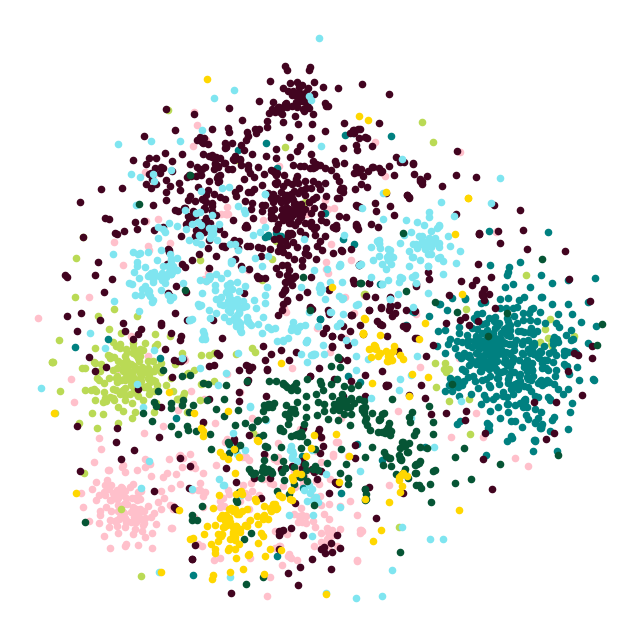

In [3]:
def train():
    model.train()
    total_loss = 0
    for pos_rw, neg_rw in loader:
        optimizer.zero_grad()
        loss = model.loss(pos_rw.to(device), neg_rw.to(device))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)


@torch.no_grad()
def test():
    model.eval()
    z = model()
    acc = model.test(z[data.train_mask], data.y[data.train_mask],
                     z[data.test_mask], data.y[data.test_mask], max_iter=150)
    return acc


for epoch in range(1, 20):
    loss = train()
    acc = test()
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, Acc: {acc:.4f}')


@torch.no_grad()
def plot_points(colors):
    model.eval()
    z = model(torch.arange(data.num_nodes, device=device))
    z = TSNE(n_components=2).fit_transform(z.cpu().numpy())
    y = data.y.cpu().numpy()

    plt.figure(figsize=(8, 8))
    for i in range(dataset.num_classes):
        plt.scatter(z[y == i, 0], z[y == i, 1], s=20, color=colors[i])
    plt.axis('off')
    plt.show()


colors = ['#ffc0cb', '#bada55', '#008080', '#420420', '#7fe5f0', '#065535', '#ffd700']
plot_points(colors)


In [7]:
len(model(torch.tensor([0,], device=device))[0])

128

In [ ]:
# !pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric

In [2]:
data.to_dict()

{'x': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 'edge_index': tensor([[   0,    0,    0,  ..., 2707, 2707, 2707],
         [ 633, 1862, 2582,  ...,  598, 1473, 2706]]),
 'y': tensor([3, 4, 4,  ..., 3, 3, 3]),
 'train_mask': tensor([ True,  True,  True,  ..., False, False, False]),
 'val_mask': tensor([False, False, False,  ..., False, False, False]),
 'test_mask': tensor([False, False, False,  ...,  True,  True,  True])}

In [8]:
sum(data.val_mask)

tensor(500)

In [9]:
sum(data.train_mask)

tensor(140)

In [10]:
sum(data.test_mask)

tensor(1000)

In [16]:
data.to_dict()

{'x': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 'edge_index': tensor([[   0,    0,    0,  ..., 2707, 2707, 2707],
         [ 633, 1862, 2582,  ...,  598, 1473, 2706]]),
 'y': tensor([3, 4, 4,  ..., 3, 3, 3]),
 'train_mask': tensor([ True,  True,  True,  ..., False, False, False]),
 'val_mask': tensor([False, False, False,  ..., False, False, False]),
 'test_mask': tensor([False, False, False,  ...,  True,  True,  True])}

In [22]:
data

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [22]:
data.num_edges

10556

In [16]:
z = model()
model.test(z[data.train_mask], data.y[data.train_mask],
                     z[data.test_mask], data.y[data.test_mask], max_iter=150)

0.595

In [21]:
z[data.test_mask].shape

torch.Size([1000, 128])

In [24]:
model.eval()
out = model(data.x.to(torch.float), data.edge_index, data.batch)

TypeError: Node2Vec.forward() takes from 1 to 2 positional arguments but 4 were given